In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
!ls

'ANOVA .ipynb'		'Data Processing.ipynb'   UTA-DataScience-Logo.png
'ANOVA attempt3.ipynb'	'NN attempt.ipynb'	  Water_Dataset.csv
 Ayat			 Presentation		 'attempt 1.ipynb'
 Beer_Dataset.csv	 README.md		 'attempt 2.ipynb'
 Beer_Dataset2.csv	'TSNE attempt.ipynb'


In [4]:
water = pd.read_csv("Water_Dataset.csv")

/tmp/ipykernel_118/2987524748.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150) have mixed types. Specify dtype option on import or set low_memory=False.
  water = pd.read_csv("Water_Dataset.csv")


In [5]:
water

,Sample,ARI1,ARI2,ARI3,ARI4,ARI5,ARI6,BOS1,BOS2,CAT1,...,AQU1.2,GRA1,GRA1.1,GRA1.2,NMT3,NMT3.1,NMT3.2,NMT4,NMT4.1,NMT4.2
0,Class,RAW,PRE,DES,DES,PRE,DES,PRE,PRE,PRE,...,PRE,PRE,PRE,PRE,RAW,RAW,RAW,DES,DES,DES
1,0,8,10,13,6,11,18,9,11,18,...,3986,52658,60925,34733,3343975,3185998,3067381,303589,275662,159114
2,1,14,11,14,4,21,20,10,15,6,...,36792,24394,51808,20021,154940,140286,147357,6922,9389,11044
3,2,5,6,0,6,6,0,0,0,0,...,124,1075,1164,706,158020,92543,67112,2754,3067,1786
4,3,7,0,6,6,10,6,8,10,0,...,255,1283,1124,827,159595,137972,45260,1535,3603,3027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13552,13551,234318,227732,238263,223074,248795,245169,201862,188755,153624,...,290,657,157,1211,462,412,1271,635,174,96
13553,13552,33408,28469,40,9,27305,37,33955,36580,49078,...,81,15312,17886,22732,15142,22693,21865,132,90,76
13554,13553,31011,33509,4321,12,31907,15,38717,9782,9922,...,83,21343,21536,15876,21956,17894,18978,86,163,81
13555,13554,11541,3482,57,19,13991,3419,9184,340,26548,...,286,16624,11136,17333,13843,15471,18640,102,310,200


In [6]:
water.isnull().sum()


Sample    0
ARI1      0
ARI2      0
ARI3      0
ARI4      0
         ..
NMT3.1    0
NMT3.2    0
NMT4      0
NMT4.1    0
NMT4.2    0
Length: 151, dtype: int64

In [7]:
beer = pd.read_csv("Beer_Dataset2.csv")

In [8]:
beer

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,7,8,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1
0,0,8.620,99.92455,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,10563.466360,61628.838770,32102.036150,16036.452060,19583.034290,34839.586910,24215.574190,26847.195870,7615.993482,14507.788630
1,1,2.028,99.92456,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,0.000000,120646.935400,79366.881980,43035.822300,37163.403620,36872.356070,59943.191070,15221.700980,0.000000,60552.112660
2,2,1.623,99.92460,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,875.384277,85265.579840,67347.691220,55966.669410,60228.257280,14277.948450,26484.025280,28578.299010,1237.980317,48038.121160
3,3,9.128,99.92467,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,16156.162390,113575.834700,52652.490790,65286.116680,30642.027650,89657.372260,116968.968500,27727.737190,17851.978290,44653.332550
4,4,8.925,99.92481,Unknown,[M-H]-,NaN,0.03,True,NaN,NaN,...,21890.798440,100697.304100,43298.215030,34068.225520,24606.922880,75265.668770,26663.392210,52700.087160,18222.944900,15594.820940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,10810,2.738,986.31675,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,0.000000,5378.062563,9291.234846,4720.779080,4633.164994,7999.560728,13120.698450,6758.874942,0.000000,6570.677826
10811,10811,3.245,987.50137,w/o MS2: Hederagenin base + O-dHex-Hex-Hex,[M-H]-,NaN,0.01,True,6.9,987.51392,...,0.000000,2953.232074,5512.150894,2113.845978,3088.989266,2839.170389,10628.574660,2357.221854,0.000000,2371.273309
10812,10812,2.333,990.29031,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,0.000000,5393.739901,2709.341208,1203.474892,767.478226,1649.083713,512.948664,13472.807120,0.000000,3648.060895
10813,10813,2.840,991.33838,Unknown,[M-H]-,NaN,0.14,True,NaN,NaN,...,0.000000,8818.918344,10795.305250,11375.458300,9576.179240,28849.763260,5447.103743,13892.908920,0.000000,7960.345000


In [9]:
beer.isnull().sum()

Alignment ID       0
Average Rt(min)    0
Average Mz         0
Metabolite name    0
Adduct type        0
                  ..
4.1                0
5.1                0
6.1                0
7.1                0
8.1                0
Length: 122, dtype: int64

In [10]:
beer.index

RangeIndex(start=0, stop=10815, step=1)

In [11]:
beer.columns

Index(['Alignment ID', 'Average Rt(min)', 'Average Mz', 'Metabolite name',
       'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned',
       'Reference RT', 'Reference m/z',
       ...
       '7', '8', '1.1', '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1'],
      dtype='object', length=122)

In [12]:
beer.drop('1.1', inplace=True, axis=1)
beer.drop('2.1', inplace=True, axis=1)
beer.drop('3.1', inplace=True, axis=1)
beer.drop('4.1', inplace=True, axis=1)
beer.drop('5.1', inplace=True, axis=1)
beer.drop('6.1', inplace=True, axis=1)
beer.drop('7.1', inplace=True, axis=1)
beer.drop('8.1', inplace=True, axis=1)

beer.drop('1', inplace=True, axis=1)
beer.drop('2', inplace=True, axis=1)
beer.drop('3', inplace=True, axis=1)
beer.drop('4', inplace=True, axis=1)
beer.drop('5', inplace=True, axis=1)
beer.drop('6', inplace=True, axis=1)
beer.drop('7', inplace=True, axis=1)



In [13]:
beer.drop('8', inplace=True, axis=1)


In [14]:
beer

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,B_SOU_1,B_SOU_2,B_SOU_QC,B_STU_1,B_STU_2,B_STU_QC,B_Water,B_WHE_1,B_WHE_2,B_WHE_QC
0,0,8.620,99.92455,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,73719,89146,74013,28299,33737,95728,5178,76578,65488,79130
1,1,2.028,99.92456,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,62209,118909,59463,2817,8898,0,0,126048,69649,78440
2,2,1.623,99.92460,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,72732,71136,64766,506,4056,0,0,81025,75504,118071
3,3,9.128,99.92467,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,138518,117891,166974,39029,56986,28977,3533,109281,118129,114948
4,4,8.925,99.92481,Unknown,[M-H]-,NaN,0.03,True,NaN,NaN,...,98157,106562,101819,110164,151687,32366,9005,96784,102383,100782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,10810,2.738,986.31675,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,12505,29202,17793,14726,7862,6355,0,2404,885,8111
10811,10811,3.245,987.50137,w/o MS2: Hederagenin base + O-dHex-Hex-Hex,[M-H]-,NaN,0.01,True,6.9,987.51392,...,8653,0,16576,0,2209,1795,0,3128,6292,916
10812,10812,2.333,990.29031,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,0,1546,0,3243,2985,6378,0,7053,0,2866
10813,10813,2.840,991.33838,Unknown,[M-H]-,NaN,0.14,True,NaN,NaN,...,9596,1243,558,25771,25472,23963,0,14421,13217,20525


In [15]:
columns_to_drop = ['Average Rt(min)', 'Average Mz', 'Metabolite name', 'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned', 'Reference RT', 'Reference m/z', 'Formula', 'Ontology', 'INCHIKEY', 'SMILES', 'Annotation tag (VS1.0)', 'RT matched', 'm/z matched', 'MS/MS matched', 'Comment', 'Manually modified for annotation', 'Manually modified for quantification','Isotope tracking parent ID', 'Isotope tracking weight number', 'RT similarity', 'm/z similarity','Simple dot product','Weighted dot product','Reverse dot product','Matched peaks count','Matched peaks percentage','Total score','S/N average','Spectrum reference file name','MS1 isotopic spectrum','MS/MS spectrum', 'Alignment ID']  # List of column names to drop
beer = beer.drop(columns=columns_to_drop)

In [16]:
beer

,C_All_QC1,C_All_QC2,C_BLD_1,C_BLD_2,C_BLD_QC,C_GER_1,C_GER_2,C_GER_3,C_GER_4,C_GER_5,...,B_SOU_1,B_SOU_2,B_SOU_QC,B_STU_1,B_STU_2,B_STU_QC,B_Water,B_WHE_1,B_WHE_2,B_WHE_QC
0,14285,70286,74725,94139,61199,86427,77152,96598,98106,93064,...,73719,89146,74013,28299,33737,95728,5178,76578,65488,79130
1,0,168078,97020,177158,169194,167099,175199,96188,184790,94333,...,62209,118909,59463,2817,8898,0,0,126048,69649,78440
2,0,97993,101905,67187,50003,105860,91105,311865,106703,97070,...,72732,71136,64766,506,4056,0,0,81025,75504,118071
3,23503,125571,129359,141997,131331,130056,132522,135759,136604,173657,...,138518,117891,166974,39029,56986,28977,3533,109281,118129,114948
4,19943,106607,112249,175515,112077,137850,114639,119590,120960,126641,...,98157,106562,101819,110164,151687,32366,9005,96784,102383,100782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,21723,5497,15012,585,8519,9754,14434,6748,11305,10892,...,12505,29202,17793,14726,7862,6355,0,2404,885,8111
10811,12596,8671,0,0,566,0,11574,0,0,0,...,8653,0,16576,0,2209,1795,0,3128,6292,916
10812,3022,5616,3517,679,0,0,0,0,0,1844,...,0,1546,0,3243,2985,6378,0,7053,0,2866
10813,34593,26920,35914,275,26585,6385,26056,34514,1425,27827,...,9596,1243,558,25771,25472,23963,0,14421,13217,20525


In [17]:
#checking for missing values
beer.isnull().sum()

C_All_QC1    0
C_All_QC2    0
C_BLD_1      0
C_BLD_2      0
C_BLD_QC     0
            ..
B_STU_QC     0
B_Water      0
B_WHE_1      0
B_WHE_2      0
B_WHE_QC     0
Length: 71, dtype: int64

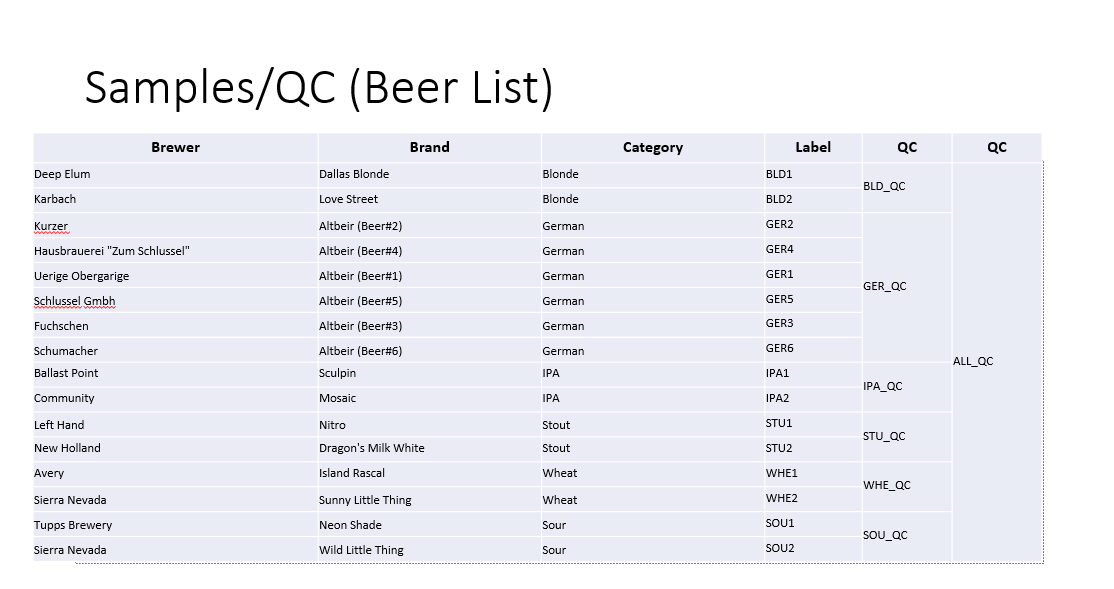

In [18]:
# print(beer.describe())

In [19]:
#transposing the dataset
beer = beer.T

In [20]:
beer

,0,1,2,3,4,5,6,7,8,9,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
C_All_QC1,14285,0,0,23503,19943,44285,21736,0,0,21406,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
C_All_QC2,70286,168078,97993,125571,106607,140786,116265,174589,284981,218494,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
C_BLD_1,74725,97020,101905,129359,112249,144078,121089,358711,181429,225109,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
C_BLD_2,94139,177158,67187,141997,175515,50697,228039,178905,264800,206247,...,0,0,657,0,30023,585,0,679,275,0
C_BLD_QC,61199,169194,50003,131331,112077,145360,121956,159002,232005,222046,...,0,0,5363,0,31380,8519,566,0,26585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_STU_QC,95728,0,0,28977,32366,25930,30662,0,0,18703,...,0,0,27888,0,23537,6355,1795,6378,23963,0
B_Water,5178,0,0,3533,9005,8202,3511,0,0,26702,...,0,0,0,0,0,0,0,0,0,0
B_WHE_1,76578,126048,81025,109281,96784,119715,103349,137454,218480,352576,...,0,0,23226,0,902,2404,3128,7053,14421,4169
B_WHE_2,65488,69649,75504,118129,102383,127892,110958,220868,130580,192048,...,0,0,18736,0,1089,885,6292,0,13217,0


In [21]:
row_names = beer.index.tolist()
print(row_names)
row_names_count = len(beer.index)
print("Number of row names:", row_names_count)

['C_All_QC1', 'C_All_QC2', 'C_BLD_1', 'C_BLD_2', 'C_BLD_QC', 'C_GER_1', 'C_GER_2', 'C_GER_3', 'C_GER_4', 'C_GER_5', 'C_GER_6', 'C_GER_QC', 'C_IPA_1', 'C_IPA_2', 'C_IPA_QC', 'C_SOU_1', 'C_SOU_2', 'C_SOU_QC', 'C_STU_1', 'C_STU_2', 'C_STU_QC', 'C_Water', 'C_WHE_1', 'C_WHE_2', 'C_WHE_QC', 'A_BLD_1', 'A_BLD_2', 'A_BLD_QC', 'A_GER_1', 'A_GER_2', 'A_GER_3', 'A_GER_4', 'A_GER_5', 'A_GER_6', 'A_GER_QC', 'A_IPA_1', 'A_IPA_2', 'A_IPA_QC', 'A_SOU_1', 'A_SOU_2', 'A_SOU_QC', 'A_STU_1', 'A_STU_2', 'A_WHE_1', 'A_WHE_2', 'A_WHE_QC', 'B_All_QC1', 'B_All_QC2', 'B_BLD_1', 'B_BLD_2', 'B_BLD_QC', 'B_GER_1', 'B_GER_2', 'B_GER_3', 'B_GER_4', 'B_GER_5', 'B_GER_6', 'B_GER_QC', 'B_IPA_1', 'B_IPA_2', 'B_IPA_QC', 'B_SOU_1', 'B_SOU_2', 'B_SOU_QC', 'B_STU_1', 'B_STU_2', 'B_STU_QC', 'B_Water', 'B_WHE_1', 'B_WHE_2', 'B_WHE_QC']
Number of row names: 71


In [22]:
column_names = beer.columns.tolist()
print(column_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [23]:
beer

,0,1,2,3,4,5,6,7,8,9,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
C_All_QC1,14285,0,0,23503,19943,44285,21736,0,0,21406,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
C_All_QC2,70286,168078,97993,125571,106607,140786,116265,174589,284981,218494,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
C_BLD_1,74725,97020,101905,129359,112249,144078,121089,358711,181429,225109,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
C_BLD_2,94139,177158,67187,141997,175515,50697,228039,178905,264800,206247,...,0,0,657,0,30023,585,0,679,275,0
C_BLD_QC,61199,169194,50003,131331,112077,145360,121956,159002,232005,222046,...,0,0,5363,0,31380,8519,566,0,26585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_STU_QC,95728,0,0,28977,32366,25930,30662,0,0,18703,...,0,0,27888,0,23537,6355,1795,6378,23963,0
B_Water,5178,0,0,3533,9005,8202,3511,0,0,26702,...,0,0,0,0,0,0,0,0,0,0
B_WHE_1,76578,126048,81025,109281,96784,119715,103349,137454,218480,352576,...,0,0,23226,0,902,2404,3128,7053,14421,4169
B_WHE_2,65488,69649,75504,118129,102383,127892,110958,220868,130580,192048,...,0,0,18736,0,1089,885,6292,0,13217,0


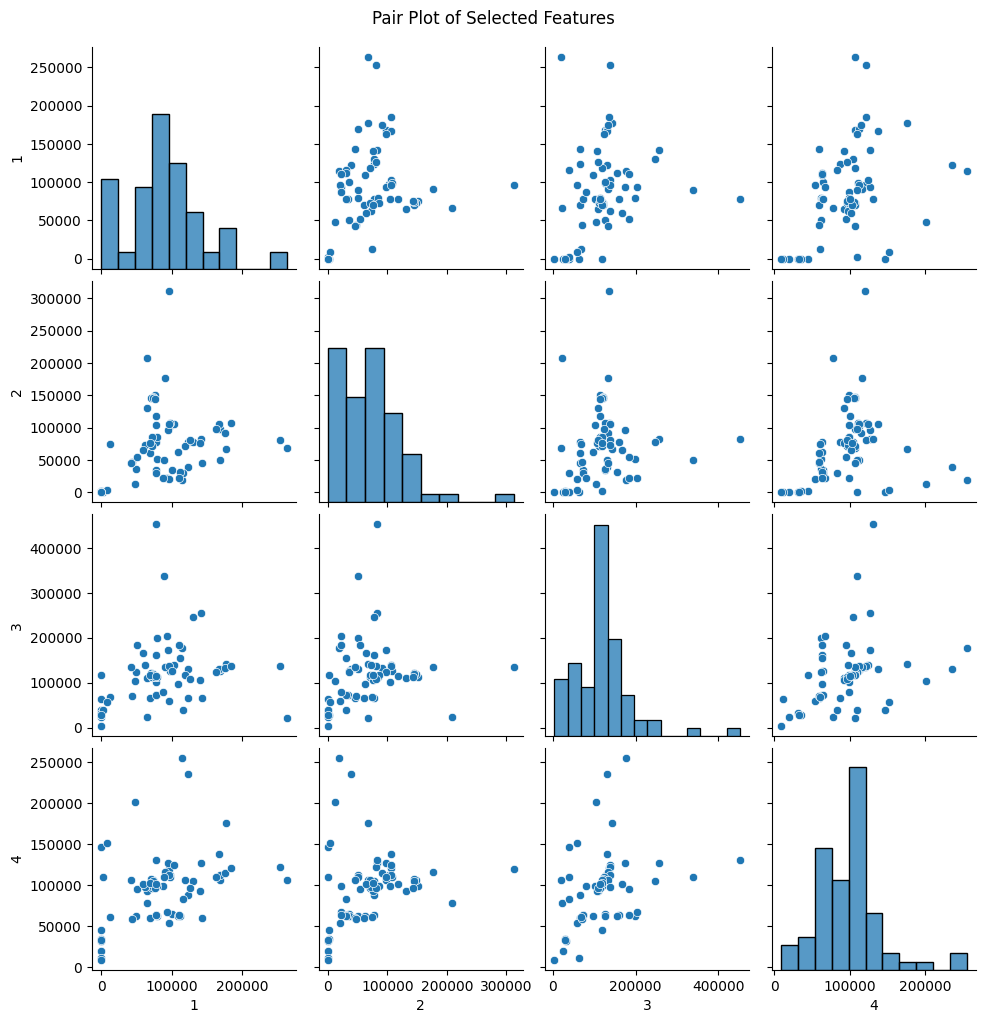

In [24]:
# Select a subset of features for the pair plot
selected_features = [1, 2, 3,4]
subset_data = beer[selected_features]
# Create a pair plot
sns.pairplot(subset_data)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


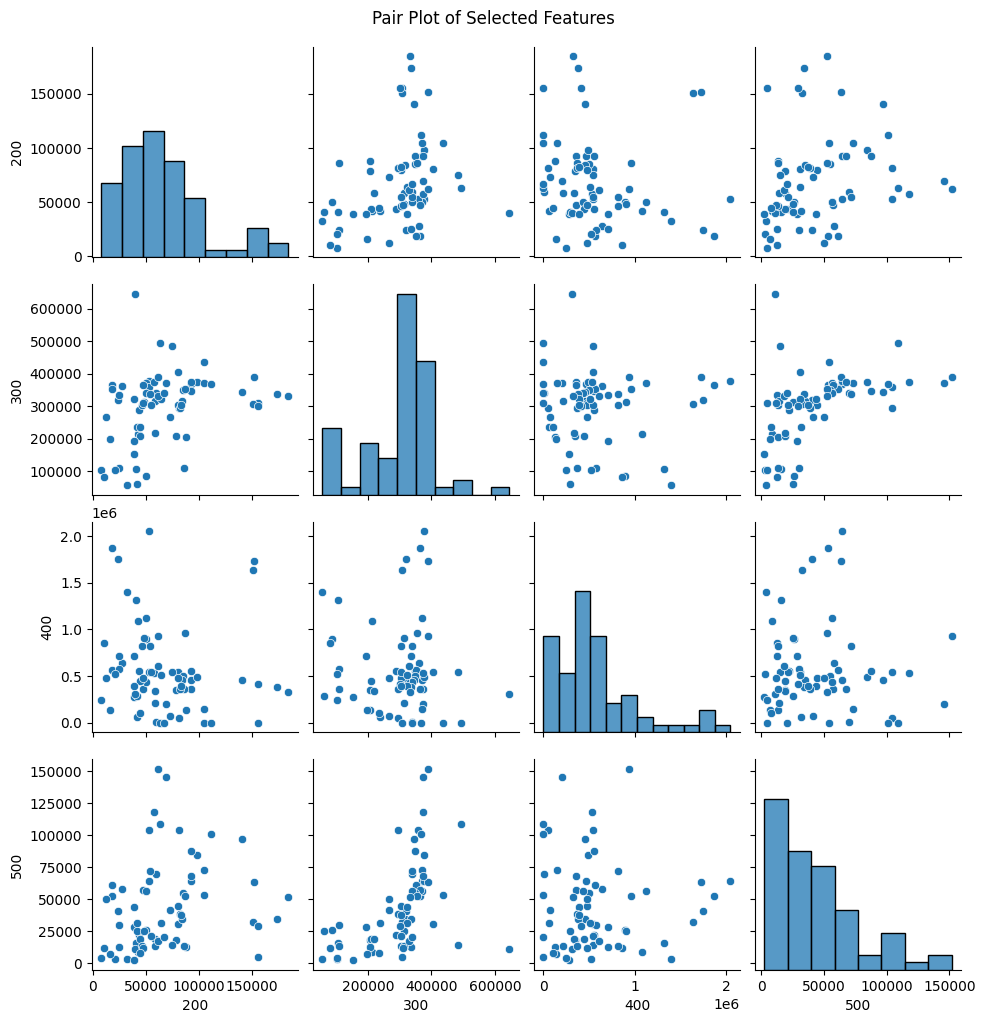

In [25]:
# Select a subset of features for the pair plot
selected_features = [200, 300, 400, 500]
subset_data = beer[selected_features]
# Create a pair plot
sns.pairplot(subset_data)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


In [26]:

# Select two specific beers for comparison (choose from the provided list)
beer1 = 'C_SOU_1'  # Replace with the name of the first beer sample
beer2 = 'C_GER_1'  # Replace with the name of the second beer sample

# Subset the DataFrame for the selected beers
beer1_data = beer.loc[beer1]
beer2_data = beer.loc[beer2]

# Combine the data into a new DataFrame for easy comparison
comparison_df = pd.DataFrame({f'{beer1} Features': beer1_data, f'{beer2} Features': beer2_data})

# Print the DataFrame to compare the feature values between the two beers
print(comparison_df)


       C_SOU_1 Features  C_GER_1 Features
0                104730             86427
1                141890            167099
2                 82725            105860
3                256273            130056
4                126325            137850
...                 ...               ...
10810               645              9754
10811             10886                 0
10812                 0                 0
10813             14853              6385
10814              1757                 0

[10815 rows x 2 columns]


In [28]:
# #Feature Scaling
# #standarizing the range of the features, to ensure that all the features have the same scale 
# #helpful for algorithms that rely on distance between data points such as k-means clustering

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(beer2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(beer2)

print("Before Scaling:")
print(beer2.describe())

print("\nAfter Scaling:")
print(pd.DataFrame(scaled_data, columns=beer2.columns).describe())


In [53]:
# #seeing if there is any significantly different points
# #
# from scipy.stats import zscore

# z_scores = zscore(beer2)
# filtered_data = beer2[(z_scores < 3).all(axis=1)]


In [62]:
# from scipy.stats import zscore

# # Detect outliers using Z-score
# z_scores = zscore(beer2)
# filtered_data = beer2[(z_scores < 3).all(axis=1)]

# # Visualize data before and after outlier removal
# import matplotlib.pyplot as plt
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# beer2.boxplot(ax=axes[0])
# axes[0].set_title('Before Outlier Removal')
# filtered_data.boxplot(ax=axes[1])
# axes[1].set_title('After Outlier Removal')
# plt.show()


In [28]:
# #analyzing one type of beer for now
# selected_samples = ['C_All_QC1', 'C_All_QC2', 'C_BLD_1', 'C_BLD_2', 'C_BLD_QC']

# # Filtering to include only the selected samples
# selected_samples_df = beer2.loc[selected_samples]

# #box plot for the selected samples to visualize the distribution of features within each beer category
# plt.figure(figsize=(10, 10))
# plt.boxplot(selected_samples_df.T.values, labels=selected_samples_df.index)
# plt.xlabel('Selected Beer Samples')
# plt.ylabel('Feature Values')
# plt.title('Feature Distribution for Selected Beer Samples')
# plt.xticks(rotation='vertical')
# plt.show()


In [29]:
# #analyzing one type of beer for now
# selected_samples = ['C_GER_1', 'C_GER_2', 'C_GER_3', 'C_GER_4', 'C_GER_5', 'C_GER_6', 'C_GER_QC']

# # Filtering to include only the selected samples
# selected_samples_df = beer2.loc[selected_samples]

# #box plot for the selected samples to visualize the distribution of features within each beer category
# plt.figure(figsize=(10, 10))
# plt.boxplot(selected_samples_df.T.values, labels=selected_samples_df.index)
# plt.xlabel('Selected Beer Samples')
# plt.ylabel('Feature Values')
# plt.title('Feature Distribution for Selected Beer Samples')
# plt.xticks(rotation='vertical')
# plt.show()


In [30]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))

# # box plot
# plt.boxplot(selected_samples_df.T.values, labels=selected_samples_df.index)

# #labels and title
# plt.xlabel('Selected Beer Samples')
# plt.ylabel('Feature Values')
# plt.title('Feature Distribution for Selected Beer Samples')
# plt.xticks(rotation='vertical')
# plt.show()



['Alignment ID', 'C_All_QC1', 'C_All_QC2', 'C_BLD_1', 'C_BLD_2', 'C_BLD_QC', 'C_GER_1', 'C_GER_2', 'C_GER_3', 'C_GER_4', 'C_GER_5', 'C_GER_6', 'C_GER_QC', 'C_IPA_1', 'C_IPA_2', 'C_IPA_QC', 'C_SOU_1', 'C_SOU_2', 'C_SOU_QC', 'C_STU_1', 'C_STU_2', 'C_STU_QC', 'C_Water', 'C_WHE_1', 'C_WHE_2', 'C_WHE_QC', 'A_BLD_1', 'A_BLD_2', 'A_BLD_QC', 'A_GER_1', 'A_GER_2', 'A_GER_3', 'A_GER_4', 'A_GER_5', 'A_GER_6', 'A_GER_QC', 'A_IPA_1', 'A_IPA_2', 'A_IPA_QC', 'A_SOU_1', 'A_SOU_2', 'A_SOU_QC', 'A_STU_1', 'A_STU_2', 'A_WHE_1', 'A_WHE_2', 'A_WHE_QC', 'B_All_QC1', 'B_All_QC2', 'B_BLD_1', 'B_BLD_2', 'B_BLD_QC', 'B_GER_1', 'B_GER_2', 'B_GER_3', 'B_GER_4', 'B_GER_5', 'B_GER_6', 'B_GER_QC', 'B_IPA_1', 'B_IPA_2', 'B_IPA_QC', 'B_SOU_1', 'B_SOU_2', 'B_SOU_QC', 'B_STU_1', 'B_STU_2', 'B_STU_QC', 'B_Water', 'B_WHE_1', 'B_WHE_2', 'B_WHE_QC']

In [31]:
# #analyzing one type of beer for now
# selected_samples2 = ['C_BLD_1','C_GER_1', 'C_WHE_1', 'A_IPA_1', 'B_STU_1', 'B_BLD_1',  'B_IPA_1']

# # Filtering to include only the selected samples
# selected_samples_df = beer2.loc[selected_samples]

# #box plot for the selected samples to visualize the distribution of features within each beer category
# plt.figure(figsize=(10, 10))
# plt.boxplot(selected_samples_df.T.values, labels=selected_samples_df.index)
# plt.xlabel('Selected Beer Samples')
# plt.ylabel('Feature Values')
# plt.title('Feature Distribution for Selected Beer Samples')
# plt.xticks(rotation='vertical')
# plt.show()


In [44]:
beer2.columns

RangeIndex(start=0, stop=10815, step=1)

RangeIndex(start=0, stop=10815, step=1)

In [76]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=4)
# pca_result = pca.fit_transform(beer2)

# plt.figure(figsize=(8, 6))
# plt.scatter(pca_result[:, 0], pca_result[:, 1])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Visualization of Beer Samples')
# plt.show()


In [77]:

# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# tsne_result = tsne.fit_transform(beer2)

# plt.figure(figsize=(10, 10))
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.title('t-SNE Visualization of Beer Samples')
# plt.show()


In [78]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=10, random_state=42)  
# cluster_labels = kmeans.fit_predict(beer2)

# # Visualize the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.title('K-Means Clustering of Beer Samples')
# plt.colorbar()
# plt.show()
